In [1]:

import aifc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sound_file = aifc.open('sample_recordingwav.aif', 'rb')

In [3]:
# View the AIFF file in byte form
sound_wave =  sound_file.readframes(-1)
print(sound_wave[:100])

b'\xff\xd3\xff\xd3\xff\xd8\xff\xd8\x00\x08\x00\x08\xff\xf7\xff\xf7\xff\xf3\xff\xf3\xff\xee\xff\xee\xff\xe6\xff\xe6\xff\xed\xff\xed\x00\x11\x00\x11\xff\xf0\xff\xf0\xff\xe0\xff\xe0\x00\x0b\x00\x0b\x00\x19\x00\x19\x00\x18\x00\x18\x00"\x00"\x00)\x00)\x00\x03\x00\x03\xff\xf8\xff\xf8\xff\xe9\xff\xe9\xff\xd2\xff\xd2\xff\xd6\xff\xd6\xff\xfd\xff\xfd\x00\x07\x00\x07\xff\xd7\xff\xd7\xff\xf4\xff\xf4'


In [4]:

# View number of frames (pieces of information) per second
# Gives us an idea of how large the soundwave is
# This file's frame rate (frequency) is 44kHz and it is approx. 17 seconds long = 749,700 pieces of information! 
# We only printed out the first 100 pieces of information above
frame_rate = sound_file.getframerate()
print(frame_rate)

44100


In [5]:

# Convert from byte form to integers
sound_signal = np.frombuffer(sound_wave, dtype=np.int16)
print(sound_signal[:100])

[-11265 -11265  -9985  -9985   2048   2048  -2049  -2049  -3073  -3073
  -4353  -4353  -6401  -6401  -4609  -4609   4352   4352  -3841  -3841
  -7937  -7937   2816   2816   6400   6400   6144   6144   8704   8704
  10496  10496    768    768  -1793  -1793  -5633  -5633 -11521 -11521
 -10497 -10497   -513   -513   1792   1792 -10241 -10241  -2817  -2817
   6656   6656  11264  11264  14080  14080   8192   8192  15872  15872
  15104  15104   3840   3840  -1281  -1281  -8449  -8449  -6145  -6145
     -1     -1   2048   2048  -2305  -2305  -1793  -1793  -4353  -4353
  -1025  -1025   9472   9472   2304   2304   7424   7424  13824  13824
   4096   4096    768    768   5888   5888   1024   1024   2048   2048]


In [6]:

# This now becomes easy: check length of signal
signal_length = sound_signal.size
print(signal_length)

776730


In [7]:

# Find the sound wave time stamps. We'll use these to visualise the sound wave.
time_stamps_wave = np.linspace(start=0, stop=signal_length/frame_rate, num=signal_length)
print(time_stamps_wave[:100])

[0.00000000e+00 2.26757662e-05 4.53515323e-05 6.80272985e-05
 9.07030646e-05 1.13378831e-04 1.36054597e-04 1.58730363e-04
 1.81406129e-04 2.04081895e-04 2.26757662e-04 2.49433428e-04
 2.72109194e-04 2.94784960e-04 3.17460726e-04 3.40136492e-04
 3.62812258e-04 3.85488025e-04 4.08163791e-04 4.30839557e-04
 4.53515323e-04 4.76191089e-04 4.98866855e-04 5.21542622e-04
 5.44218388e-04 5.66894154e-04 5.89569920e-04 6.12245686e-04
 6.34921452e-04 6.57597219e-04 6.80272985e-04 7.02948751e-04
 7.25624517e-04 7.48300283e-04 7.70976049e-04 7.93651815e-04
 8.16327582e-04 8.39003348e-04 8.61679114e-04 8.84354880e-04
 9.07030646e-04 9.29706412e-04 9.52382179e-04 9.75057945e-04
 9.97733711e-04 1.02040948e-03 1.04308524e-03 1.06576101e-03
 1.08843678e-03 1.11111254e-03 1.13378831e-03 1.15646407e-03
 1.17913984e-03 1.20181561e-03 1.22449137e-03 1.24716714e-03
 1.26984290e-03 1.29251867e-03 1.31519444e-03 1.33787020e-03
 1.36054597e-03 1.38322174e-03 1.40589750e-03 1.42857327e-03
 1.45124903e-03 1.473924

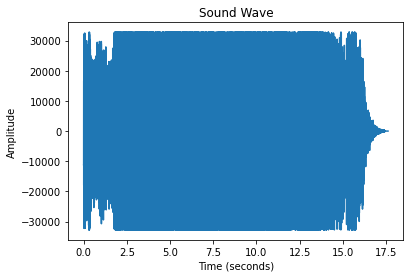

In [8]:

# Plot the sound wave
plt.plot(time_stamps_wave, sound_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sound Wave')
plt.show()